In [2]:
from sportsipy.nfl.teams import Teams
from scipy.stats import pearsonr,skew,kurtosis,norm
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections
import numpy as np
import matplotlib.mlab as mlab
from matplotlib.ticker import PercentFormatter
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
print('Correlation(WinRatio,GoalsForRatio)\n')

maxCorr= -1.1
minCorr= 1.1
minYear = 2021
maxYear = 2021
corrList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'T' : team.games_played-(team.wins+team.losses),
                    'L' : team.losses,
                    'GP' : team.games_played,
                    'WinPct' : round(100*team.wins/team.games_played,3),
                    'LosPct' : round(100*team.losses/team.games_played,3),
                    'GF' : team.points_for,
                    'GA' : team.points_against,
                    'GD' : team.points_for-team.points_against,
                    'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                    'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

    df = pd.DataFrame(statd)
    df = df.transpose()
    
    corr, _ = pearsonr(df['GfrPct'].tolist(), df['WinPct'].tolist())
    corrList.append(corr)
    
    if maxCorr < minCorr:
        minCorr = corr
        maxCorr = corr
        minYear = year
        maxYear = year
        print('%s: %s (new min) (new max)' % (year,round(corr,3)))
    elif corr < minCorr:
        minCorr= corr
        minYear = year
        print('%s: %s (new min)' % (year,round(corr,3)))
    elif corr > maxCorr:
        maxCorr= corr
        maxYear = year
        print('%s: %s (new max)' % (year,round(corr,3)))
    else: 
        print('%s: %s' % (year,round(corr,3)))
        
print('MIN:%s (%s)' % (minYear,round(minCorr,3)))
print('MAX:%s (%s)' % (maxYear,round(maxCorr,3)))
print('AVG:%s' % (round(sum(corrList)/len(corrList),3)))
''' 
1970-2021
MIN:1981 (0.845)
MAX:1984 (0.965)
AVG:0.91
'''

Correlation(WinRatio,GoalsForRatio)

1970: 0.916 (new min) (new max)
1971: 0.883 (new min)
1972: 0.938 (new max)
1973: 0.95 (new max)
1974: 0.922
1975: 0.955 (new max)
1976: 0.911
1977: 0.903
1978: 0.865 (new min)
1979: 0.91
1980: 0.928
1981: 0.845 (new min)
1982: 0.857
1983: 0.882
1984: 0.965 (new max)
1985: 0.916
1986: 0.906
1987: 0.897
1988: 0.923
1989: 0.883
1990: 0.903
1991: 0.911
1992: 0.94
1993: 0.874
1994: 0.893
1995: 0.888
1996: 0.898
1997: 0.928
1998: 0.939
1999: 0.898
2000: 0.92
2001: 0.926
2002: 0.908
2003: 0.909
2004: 0.894
2005: 0.95
2006: 0.904
2007: 0.932
2008: 0.91
2009: 0.913
2010: 0.901
2011: 0.91
2012: 0.92
2013: 0.936
2014: 0.946
2015: 0.932
2016: 0.854
2017: 0.912
2018: 0.921
2019: 0.871
2020: 0.909
MIN:1981 (0.845)
MAX:1984 (0.965)
AVG:0.91


In [41]:
year=1984
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
    statd[i] = {'Team' : team.name,
                'W' : team.wins,
                'T' : team.games_played-(team.wins+team.losses),
                'L' : team.losses,
                'G' : team.games_played,
                'WinPct' : round(100*team.wins/team.games_played,3),
                'LosPct' : round(100*team.losses/team.games_played,3),
                'GF' : team.points_for,
                'GA' : team.points_against,
                'GD' : team.points_for-team.points_against,
                'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

df = pd.DataFrame(statd)
df = df.transpose()

'''
x = list(df['LosPct'])
seq = sorted(x,reverse=False)
index = [seq.index(v) for v in x]
df['Iwin'] =  index
'''

l = df[['WinPct','LosPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: (float(x[1]), (-float(x[0])), (-float(x[2]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GD','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igd'] =  index

'''
x = list(df['GD'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igd'] =  index'
'''

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

'''
x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index
'''    

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','T','L','G','GF','GA','GD','WinPct','LosPct','GD_per','GfrPct','Iwin','Igd','Igfp','Delta','Idel']]
df['WINvs50'] = df['WinPct']-50
df_mdian = df.loc[abs(df['GD']) == min(abs((df['GD'])))]
df_mdian = df_mdian[abs(df_mdian['WINvs50']) == min(abs(df_mdian['WINvs50']))]
df_lucky = df[df['Delta'] == max(df['Delta'])].head(1)
df_nluck = df[df['Delta'] == min(df['Delta'])].head(1)
print('%s Luckiest,Median,Unluckiest Teams:' % year)
df_ext = pd.concat([df_lucky,pd.concat([df_mdian,df_nluck],sort=False)],sort=False)
print(df_ext.to_string(index=False))

1984 Luckiest,Median,Unluckiest Teams:
               Team   W  T  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
   Los Angeles Rams  10  0  6  16  346  316  30   62.5   37.5   1.88  52.266     7   10    10      3     0    12.5
 Cincinnati Bengals   8  0  8  16  339  339   0     50     50      0      50    14   12    13     -1    21       0
  Green Bay Packers   8  0  8  16  390  309  81     50     50   5.06  55.794    13    6     7     -6    27       0


In [ ]:
'''
1981 Luckiest,Median,Unluckiest Teams: (most anomolous)
                Team   W  T  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
      Denver Broncos  10  0  6  16  321  289  32   62.5   37.5      2  52.623     8   14    14      6     0    12.5
 Washington Redskins   8  0  8  16  347  349  -2     50     50  -0.12  49.856    14   15    15      1     5       0
     Atlanta Falcons   7  0  9  16  426  355  71  43.75  56.25   4.44  54.545    16    6     8     -8    26   -6.25
    
1984 Luckiest,Median,Unluckiest Teams: (most predictable)
               Team   W  T  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
   Los Angeles Rams  10  0  6  16  346  316  30   62.5   37.5   1.88  52.266     7   10    10      3     0    12.5
 Cincinnati Bengals   8  0  8  16  339  339   0     50     50      0      50    14   12    13     -1    21       0
  Green Bay Packers   8  0  8  16  390  309  81     50     50   5.06  55.794    13    6     7     -6    27       0
'''

In [168]:
year=1971
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
    statd[i] = {'Team' : team.name,
                'W' : team.wins,
                'T' : team.games_played-(team.wins+team.losses),
                'L' : team.losses,
                'G' : team.games_played,
                'WinPct' : round(100*team.wins/team.games_played,3),
                'LosPct' : round(100*team.losses/team.games_played,3),
                'GF' : team.points_for,
                'GA' : team.points_against,
                'GD' : team.points_for-team.points_against,
                'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

df = pd.DataFrame(statd)
df = df.transpose()

'''
x = list(df['LosPct'])
seq = sorted(x,reverse=False)
index = [seq.index(v) for v in x]
df['Iwin'] =  index
'''

l = df[['WinPct','LosPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: (float(x[1]), (-float(x[0])), (-float(x[2]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

'''
x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index
'''    

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','T','L','G','GF','GA','WinPct','LosPct','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct','LosPct','GfrPct'],ascending = (False,True,False))
print('%s NFL Season - Ranked by %% Games Won [>LosPct]' % year)
with pd.option_context('display.max_rows',30):
    display(df)

df = df.sort_values('GfrPct',ascending=False)
print('\n%s NFL Season - Ranked by %% Points Scored [<GfrPct]' % year)
with pd.option_context('display.max_rows',30):
    display(df)

df = df.sort_values('Idel',ascending=True)
print('\n%s NFL Season - Ranked by Luck [<Delta (Igfp-Iwin)]' % year)
with pd.option_context('display.max_rows',30):
    display(df)

1971 NFL Season - Ranked by % Games Won [>LosPct]


,Team,W,T,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Dallas Cowboys,11,0,3,14,406,222,78.571,21.429,13.14,64.65,0,1,1,7
17,Minnesota Vikings,11,0,3,14,245,139,78.571,21.429,7.57,63.802,1,3,2,5
3,Miami Dolphins,10,1,3,14,315,174,71.429,21.429,10.07,64.417,2,2,0,12
7,Kansas City Chiefs,10,1,3,14,302,208,71.429,21.429,6.71,59.216,3,5,2,5
4,Baltimore Colts,10,0,4,14,313,140,71.429,28.571,12.36,69.095,4,0,-4,22
11,Washington Redskins,9,1,4,14,276,190,64.286,28.571,6.14,59.227,5,4,-1,15
8,San Francisco 49ers,9,0,5,14,300,216,64.286,35.714,6,58.14,7,6,-1,15
9,Cleveland Browns,9,0,5,14,285,273,64.286,35.714,0.86,51.075,8,11,3,4
1,Oakland Raiders,8,2,4,14,344,278,57.143,28.571,4.71,55.305,6,7,1,7
5,Los Angeles Rams,8,1,5,14,313,260,57.143,35.714,3.79,54.625,9,8,-1,15



1971 NFL Season - Ranked by % Points Scored [<GfrPct]


,Team,W,T,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
4,Baltimore Colts,10,0,4,14,313,140,71.429,28.571,12.36,69.095,4,0,-4,22
0,Dallas Cowboys,11,0,3,14,406,222,78.571,21.429,13.14,64.65,0,1,1,7
3,Miami Dolphins,10,1,3,14,315,174,71.429,21.429,10.07,64.417,2,2,0,12
17,Minnesota Vikings,11,0,3,14,245,139,78.571,21.429,7.57,63.802,1,3,2,5
11,Washington Redskins,9,1,4,14,276,190,64.286,28.571,6.14,59.227,5,4,-1,15
7,Kansas City Chiefs,10,1,3,14,302,208,71.429,21.429,6.71,59.216,3,5,2,5
8,San Francisco 49ers,9,0,5,14,300,216,64.286,35.714,6,58.14,7,6,-1,15
1,Oakland Raiders,8,2,4,14,344,278,57.143,28.571,4.71,55.305,6,7,1,7
5,Los Angeles Rams,8,1,5,14,313,260,57.143,35.714,3.79,54.625,9,8,-1,15
2,Detroit Lions,7,1,6,14,341,286,50,42.857,3.93,54.386,10,9,-1,15



1971 NFL Season - Ranked by Luck [<Delta (Igfp-Iwin)]


,Team,W,T,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
21,Philadelphia Eagles,6,1,7,14,221,302,42.857,50,-5.79,42.256,12,21,9,0
24,Chicago Bears,6,0,8,14,185,276,42.857,57.143,-6.5,40.13,17,23,6,1
22,New York Jets,6,0,8,14,212,299,42.857,57.143,-6.21,41.487,16,22,6,1
18,New England Patriots,6,0,8,14,238,325,42.857,57.143,-6.21,42.274,15,20,5,3
9,Cleveland Browns,9,0,5,14,285,273,64.286,35.714,0.86,51.075,8,11,3,4
17,Minnesota Vikings,11,0,3,14,245,139,78.571,21.429,7.57,63.802,1,3,2,5
7,Kansas City Chiefs,10,1,3,14,302,208,71.429,21.429,6.71,59.216,3,5,2,5
13,Atlanta Falcons,7,1,6,14,274,277,50,42.857,-0.21,49.728,11,12,1,7
0,Dallas Cowboys,11,0,3,14,406,222,78.571,21.429,13.14,64.65,0,1,1,7
1,Oakland Raiders,8,2,4,14,344,278,57.143,28.571,4.71,55.305,6,7,1,7


In [9]:
minDelta = 0
maxDelta = 0
deltaList = []
dlpctList = []
dlptfList = []
dlpttList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        statd[i] = {'Team' : team.name,
                    'WinPct' : round(100*team.wins/team.games_played,3),                    
                    'LosPct' : round(100*team.losses/team.games_played,3),
                    'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    l = df[['WinPct','LosPct','GfrPct']].values.tolist()
    seq = sorted(l, key=lambda x: (float(x[1]), (-float(x[0])), (-float(x[2]))))
    index = [seq.index(v) for v in l]
    df['Iwin'] =  index

    l = df[['GfrPct','WinPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Igfp'] =  index

    '''
    x = list(df['GfrPct'])
    seq = sorted(x,reverse=True)
    index = [seq.index(v) for v in x]
    df['Igfp'] =  index
    '''
    
    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
    
    print('%s: %s yearly min Delta (%s%% of possible delta given %s teams)' % (year,locMinDelta,round(locMinDelta/len(x),4),len(x)))
    print('%s:  %s yearly max Delta ( %s%% of possible delta given %s teams)' % (year,locMaxDelta,round(locMaxDelta/len(x),4),len(x)))
    
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    if locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    if locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    
    for d in x:
        deltaList.append(d) #nominal delta
        dp = round(d/len(x),2)  #normalized between -1,1 of # teams 
        dpf = 5*(int(round(100*(d)/(len(x)-1),0))//5) #bucketed to 5% 
        dpt = 10*(int(round(100*(d)/(len(x)-1),0))//10) #bucketed to 10%
        dlpctList.append(dp)
        dlptfList.append(dpf)
        dlpttList.append(dpt)

1970: -6 yearly min Delta (-0.2308% of possible delta given 26 teams)
1970:  5 yearly max Delta ( 0.1923% of possible delta given 26 teams)
1970  St. Louis Cardinals: -6 (new minDelta) (new maxDelta)
1971: -13 yearly min Delta (-0.5% of possible delta given 26 teams)
1971:  9 yearly max Delta ( 0.3462% of possible delta given 26 teams)
1971  Cincinnati Bengals: -13 (new min)
1971  Philadelphia Eagles: 9 (new max)
1972: -3 yearly min Delta (-0.1154% of possible delta given 26 teams)
1972:  7 yearly max Delta ( 0.2692% of possible delta given 26 teams)
1973: -3 yearly min Delta (-0.1154% of possible delta given 26 teams)
1973:  5 yearly max Delta ( 0.1923% of possible delta given 26 teams)
1974: -3 yearly min Delta (-0.1154% of possible delta given 26 teams)
1974:  4 yearly max Delta ( 0.1538% of possible delta given 26 teams)
1975: -3 yearly min Delta (-0.1154% of possible delta given 26 teams)
1975:  4 yearly max Delta ( 0.1538% of possible delta given 26 teams)
1976: -6 yearly min Del

In [ ]:
'''
deltaList=sorted(deltaList,reverse=False)
dlpctList=sorted(dlpctList,reverse=False)
dlptfList=sorted(dlptfList,reverse=False)
dlpttList=sorted(dlpttList,reverse=False)
'''

In [3]:
teamcList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i in range(len(teams)):
        teamcList.append(len(teams))

In [4]:
counter=collections.Counter(teamcList)
yv = list(counter.values())
yk = list(counter.keys())
yearV = []
for k,v in zip(yk,yv):
    yearV.append(int(v/k))
print(pd.DataFrame((zip(yk,yv,yearV)),columns=['teams','freq','numSeasons']).to_string(index=False))
print('\navg # teams: '+str(round(np.average(yk, weights=yv),2))+'\ntotal seasons: '+str(sum(yearV)))

 teams  freq  numSeasons
    26   156           6
    28   532          19
    30   120           4
    31    93           3
    32   608          19

avg # teams: 29.75
total seasons: 51


In [ ]:
#teamcList = sorted(teamcList)

In [15]:
import pickle
with open('teamcNFL.data', 'wb') as filehandle:
    pickle.dump(teamcList, filehandle)

In [13]:
dlpctList[:10]

[0.15, -0.08, 0.0, -0.15, -0.23, 0.12, -0.12, 0.04, 0.19, 0.04]

In [14]:
import pickle
with open('deltaNFL.data', 'wb') as filehandle:
    pickle.dump(deltaList, filehandle)
with open('dlpctNFL.data', 'wb') as filehandle:
    pickle.dump(dlpctList, filehandle)

In [8]:
print('max: ' + str(max(deltaList)))
print('min: ' + str(min(deltaList)))
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),2)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),4)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),4)))
print('skew: ' + str(round(skew(deltaList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(deltaList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(deltaList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(deltaList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(deltaList)))

NameError: name 'deltaList' is not defined

In [210]:
print('max: ' + str(max(dlpctList)))
print('min: ' + str(min(dlpctList)))
print('median: ' + str(statistics.median(dlpctList)))
print('mean: ' + str(round(statistics.mean(dlpctList),4)))
print('mode: ' + str(statistics.mode(dlpctList)))
print('pstdev: ' + str(round(statistics.pstdev(dlpctList),4)))
print('pvariance: ' + str(round(statistics.pvariance(dlpctList),4)))
print('skew: ' + str(round(skew(dlpctList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlpctList,bias=False)-3,4)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlpctList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlpctList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlpctList)))

max: 0.46
min: -0.5
median: 0.0
mean: -0.0001
mode: 0.0
pstdev: 0.1085
pvariance: 0.0118
skew: -0.13
kurtosis-3: -0.7655
quartiles(excl): [-0.06, 0.0, 0.06]
deciles(excl): [-0.12, -0.07, -0.04, 0.0, 0.0, 0.0, 0.04, 0.07, 0.12]
count: 1509


In [207]:
print('max: ' + str(max(dlptfList)))
print('min: ' + str(min(dlptfList)))
print('median: ' + str(statistics.median(dlptfList)))
print('mean: ' + str(round(statistics.mean(dlptfList),2)))
print('mode: ' + str(statistics.mode(dlptfList)))
print('pstdev: ' + str(round(statistics.pstdev(dlptfList),2)))
print('pvariance: ' + str(round(statistics.pvariance(dlptfList),2)))
print('skew: ' + str(round(skew(dlptfList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlptfList,bias=False)-3,2)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlptfList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlptfList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlptfList)))

max: 45
min: -55
median: 0
mean: -1.68
mode: 0
pstdev: 11.34
pvariance: 128.61
skew: -0.2
kurtosis-3: -0.83
quartiles(excl): [-10.0, 0.0, 5.0]
deciles(excl): [-15.0, -10.0, -5.0, 0.0, 0.0, 0.0, 0.0, 5.0, 10.0]
count: 1509


In [208]:
print('max: ' + str(max(dlpttList)))
print('min: ' + str(min(dlpttList)))
print('median: ' + str(statistics.median(dlpttList)))
print('mean: ' + str(round(statistics.mean(dlpttList),2)))
print('mode: ' + str(statistics.mode(dlpttList)))
print('pstdev: ' + str(round(statistics.pstdev(dlpttList),2)))
print('pvariance: ' + str(round(statistics.pvariance(dlpttList),2)))
print('skew: ' + str(round(skew(dlpttList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(dlpttList,bias=False)-3,2)))

quartiles=[round(q, 2) for q in statistics.quantiles(dlpttList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(dlpttList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(dlpttList)))

max: 40
min: -60
median: 0
mean: -3.6
mode: 0
pstdev: 11.74
pvariance: 137.81
skew: -0.37
kurtosis-3: -0.99
quartiles(excl): [-10.0, 0.0, 0.0]
deciles(excl): [-20.0, -10.0, -10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]
count: 1509


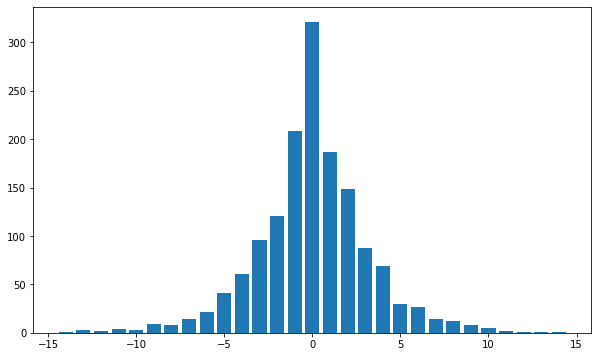

In [70]:
counter=collections.Counter(deltaList)
dely = list(counter.values())
delx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,dely)
plt.show()

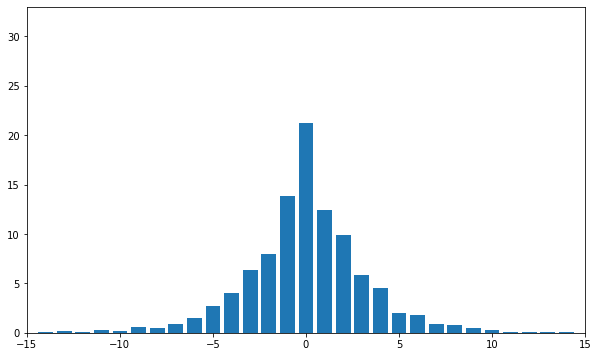

In [71]:
df_freq=pd.DataFrame(list(zip(delx,dely)),columns=['delta','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
delp = list(df_freq['pct'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,delp)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

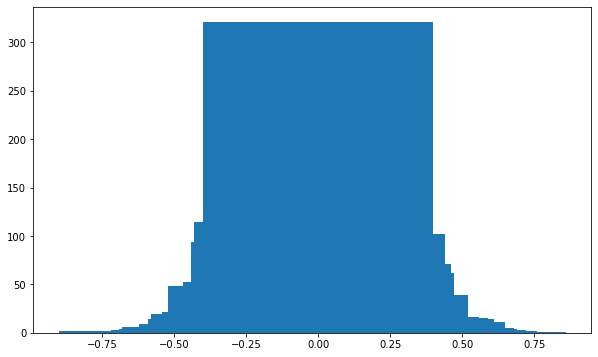

In [216]:
counter=collections.Counter(dlpctList)
dlpy = list(counter.values())
dlpx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(dlpx,dlpy)
plt.show()

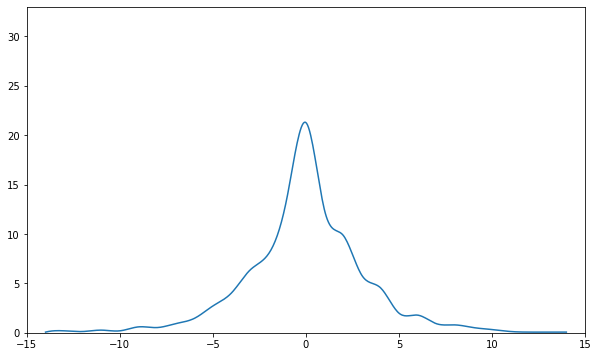

In [72]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(delx), max(delx), 500) 

#define spline
spl = make_interp_spline(delx, delp, k=3)
y_smooth = spl(xnew)

#create smooth line chart`
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(xnew, y_smooth)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

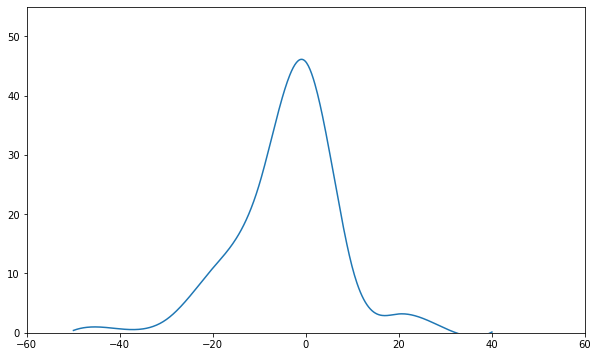

In [73]:
counter=collections.Counter(dlpttList)
dpty = list(counter.values())
dptx = list(counter.keys())

df_freq=pd.DataFrame(list(zip(dptx,dpty)),columns=['dlptt','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
dlpt = list(df_freq['pct'])

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(dptx), max(dptx), 500) 

#define spline
spl = make_interp_spline(dptx, dlpt, k=3)
y_smooth = spl(xnew)

#create smooth line chart`
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(xnew, y_smooth)
plt.xlim([-60, 60])
plt.ylim([0, 55])
plt.show()

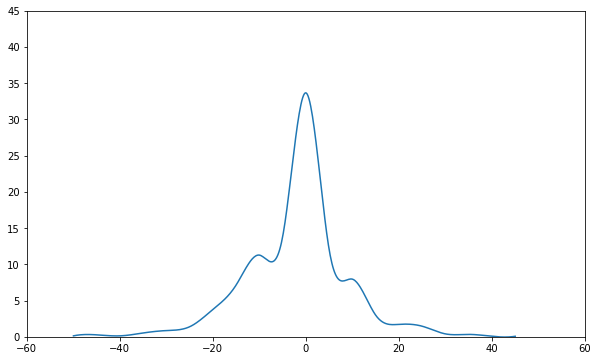

In [74]:
counter=collections.Counter(dlpctList)
dlpy = list(counter.values())
dlpx = list(counter.keys())

df_freq=pd.DataFrame(list(zip(dlpx,dlpy)),columns=['dlpct','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
dlpp = list(df_freq['pct'])

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(dlpx), max(dlpx), 500) 

#define spline
spl = make_interp_spline(dlpx, dlpp, k=3)
y_smooth = spl(xnew)

#create smooth line chart`
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(xnew, y_smooth)
plt.xlim([-60, 60])
plt.ylim([0, 45])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

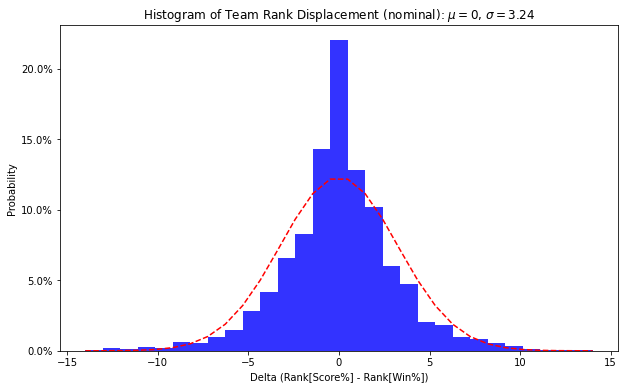

In [75]:
mu = round(statistics.mean(deltaList),2) # mean of distribution
sigma = round(statistics.pstdev(deltaList),2) # standard deviation of distribution
x = deltaList

num_bins = 1+max(deltaList)-min(deltaList)
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = plt.hist(x, num_bins, density=True, weights=np.ones(len(x)), facecolor='blue', alpha=0.8)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Delta (Rank[Score%] - Rank[Win%])')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (nominal): $\mu=%s$, $\sigma=%s$' % (mu,sigma))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

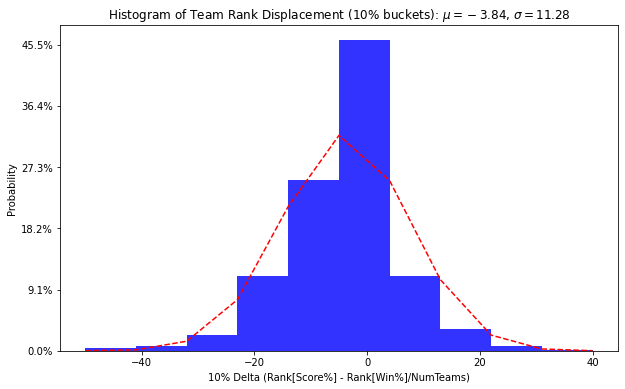

In [165]:
mu = round(statistics.mean(dlpttList),2) # mean of distribution
sigma = round(statistics.pstdev(dlpttList),2) # standard deviation of distribution
x = dlpttList

num_bins = 1+((max(x)-min(x))//10)
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = plt.hist(x, num_bins, density=True,facecolor='blue',weights=np.ones(len(x)),alpha=0.8)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)

plt.plot(bins, y, 'r--')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1/(100/(num_bins+1))))
plt.xlabel('10% Delta (Rank[Score%] - Rank[Win%]/NumTeams)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (10%% buckets): $\mu=%s$, $\sigma=%s$' % (mu,sigma))

plt.show

In [114]:
y

array([8.17022267e-06, 2.07549249e-04, 2.40261951e-03, 1.26743412e-02,
       3.04678882e-02, 3.33761218e-02, 1.66611875e-02, 3.79011680e-03,
       3.92894363e-04, 1.85598970e-05])

In [113]:
py

[0.3976143141153082,
 0.6626905235255136,
 2.253147779986746,
 10.934393638170974,
 25.115970841616964,
 45.65937707090789,
 10.934393638170974,
 3.1809145129224654,
 0.7289595758780649,
 0.13253810470510272]

In [173]:
dpty

[6, 10, 34, 165, 379, 689, 165, 48, 11, 2]

In [174]:
dlpx

[-50,
 -45,
 -40,
 -35,
 -30,
 -25,
 -20,
 -15,
 -10,
 -5,
 0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45]

In [111]:
py=[]
for dy in dpty:
    py.append(100*dy/sum(dpty))


In [129]:
 np.ones_like(dlpctList) * len(dlpctList)

array([1509, 1509, 1509, ..., 1509, 1509, 1509])

<function matplotlib.pyplot.show(close=None, block=None)>

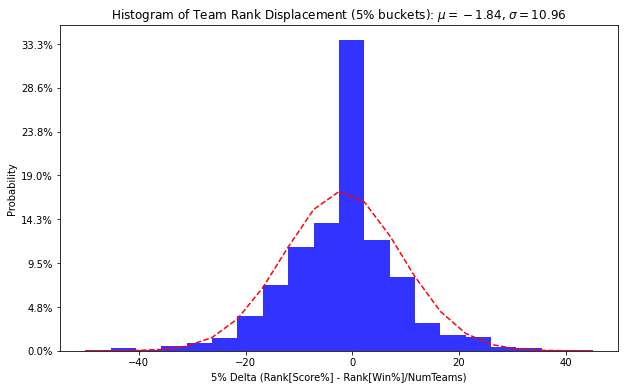

In [188]:
mu = round(statistics.mean(dlpctList),2) # mean of distribution
sigma = round(statistics.pstdev(dlpctList),2) # standard deviation of distribution
x = dlpctList

num_bins = (2*max([max(x),-min(x)]))//5
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = plt.hist(x, num_bins, density=True,weights=np.ones(len(x)), facecolor='blue', alpha=0.8)

# add a 'best fit' line
y = norm.pdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1/(100/(num_bins+1))))
plt.xlabel('5% Delta (Rank[Score%] - Rank[Win%]/NumTeams)')
plt.ylabel('Probability')
plt.title(r'Histogram of Team Rank Displacement (5%% buckets): $\mu=%s$, $\sigma=%s$' % (mu,sigma))

plt.show

In [189]:
num_bins

20

In [110]:
pd.DataFrame(list(zip(dptx,dpty,dlpt)),columns=['dlptt','freq','pct'])

,dlptt,freq,pct
0,-50,6,0.40
1,-40,10,0.66
2,-30,34,2.25
3,-20,165,10.93
4,-10,379,25.12
5,0,689,45.66
6,10,165,10.93
7,20,48,3.18
8,30,11,0.73
9,40,2,0.13


In [79]:
pd.DataFrame(list(zip(dlpx,dlpy,dlpp)),columns=['dlpct','freq','pct'])

,dlpct,freq,pct
0,-50,2,0.13
1,-45,4,0.27
2,-40,2,0.13
3,-35,8,0.53
4,-30,13,0.86
5,-25,21,1.39
6,-20,57,3.78
7,-15,108,7.16
8,-10,170,11.27
9,-5,209,13.85


In [80]:
pd.DataFrame(list(zip(delx,dely,delp)),columns=['delta','freq','pct'])

,delta,freq,pct
0,-14,1,0.07
1,-13,3,0.20
2,-12,2,0.13
3,-11,4,0.27
4,-10,3,0.20
5,-9,9,0.60
6,-8,8,0.53
7,-7,14,0.93
8,-6,22,1.46
9,-5,41,2.72
